# COVID-19 Analysis


- Coronaviruses are a large family of viruses which may cause illness in animals or humans. 
- In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe   diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). 
- The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')

## Inspecting Data ---------- EDA on Covid 19 India Analysis

In [3]:
country_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
country_df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

## Dropping the sno, ConfirmedIndianNational, ConfirmedForeignNational

In [5]:
country_df = country_df.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
country_df.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


## State-wise Recovery Rate and Mortality Rate

In [6]:
statewise = pd.pivot_table(country_df, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
statewise['Recovery Rate'] = statewise['Cured']*100 / statewise['Confirmed']
statewise['Mortality Rate'] = statewise['Deaths']*100 /statewise['Confirmed']
statewise = statewise.sort_values(by='Confirmed', ascending= False)
statewise

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


## Analysis of Active cases

In [7]:
country_df['Active'] = country_df['Confirmed'] - country_df['Cured'] - country_df['Deaths']
country_df.tail() 

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
18105,2021-08-11,8:00 AM,Telangana,638410,3831,650353,8112
18106,2021-08-11,8:00 AM,Tripura,77811,773,80660,2076
18107,2021-08-11,8:00 AM,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,8:00 AM,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,8:00 AM,West Bengal,1506532,18252,1534999,10215


## Converting into date-time format

In [8]:
country_df['Date'] = pd.to_datetime(country_df['Date']) 
country_df.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


## Top 15 states 

In [9]:
country_df['State/UnionTerritory'].value_counts().head(15)

Kerala               560
Delhi                528
Rajasthan            527
Uttar Pradesh        526
Haryana              526
Ladakh               523
Tamil Nadu           523
Punjab               521
Jammu and Kashmir    521
Maharashtra          520
Karnataka            520
Andhra Pradesh       518
Uttarakhand          515
Odisha               514
Puducherry           512
Name: State/UnionTerritory, dtype: int64

## Active cases in top 7 states during the period of time

- Kerela has the highest number of active cases in month of may to june
- Tamil Nadu and Uttar-pradesh are second highest
- Delhi has minimum number of cases

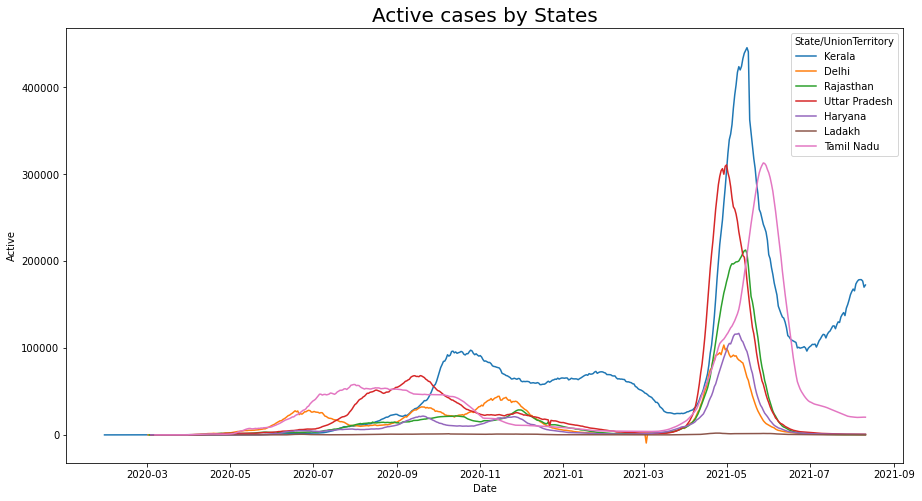

In [10]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=country_df[country_df['State/UnionTerritory'].isin(['Kerala','Delhi','Rajasthan','Uttar Pradesh','Haryana','Tamil Nadu','Ladakh'])],
                x='Date',y='Active', hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()

In [11]:
india_cases = country_df[country_df['Date'] == country_df['Date'].max()].copy().fillna(0)
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)
india_cases.head(10)

,Time,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,8:00 AM,7412,129,7548,7
Andhra Pradesh,8:00 AM,1952736,13564,1985182,18882
Arunachal Pradesh,8:00 AM,47821,248,50605,2536
Assam,8:00 AM,559684,5420,576149,11045
Bihar,8:00 AM,715352,9646,725279,281
Chandigarh,8:00 AM,61150,811,61992,31
Chhattisgarh,8:00 AM,988189,13544,1003356,1623
Dadra and Nagar Haveli and Daman and Diu,8:00 AM,10646,4,10654,4
Delhi,8:00 AM,1411280,25068,1436852,504


## Top 10 States with highest number of death

- Maharastra has the highest number of death rate

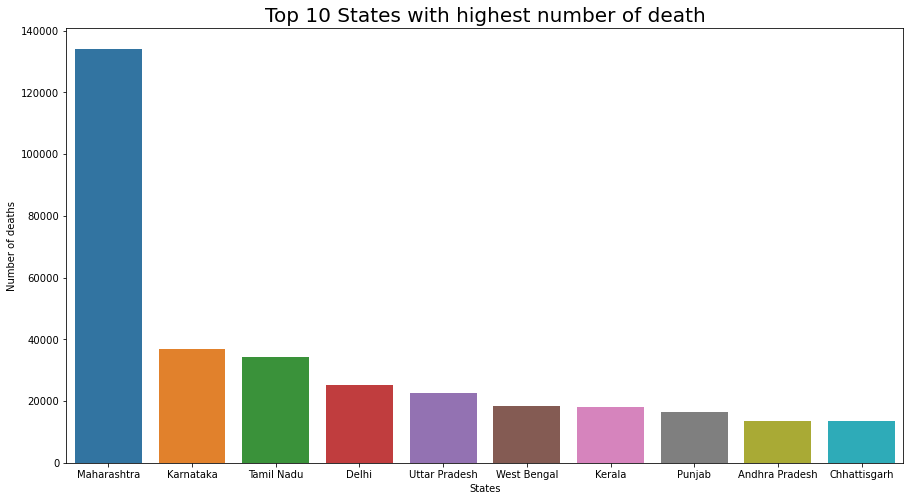

In [12]:
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index).set(xlabel='States', ylabel='Number of deaths')
plt.show()

## Top 10 States with highest number of cured cases

- Maharastra has highest number of cured cases also

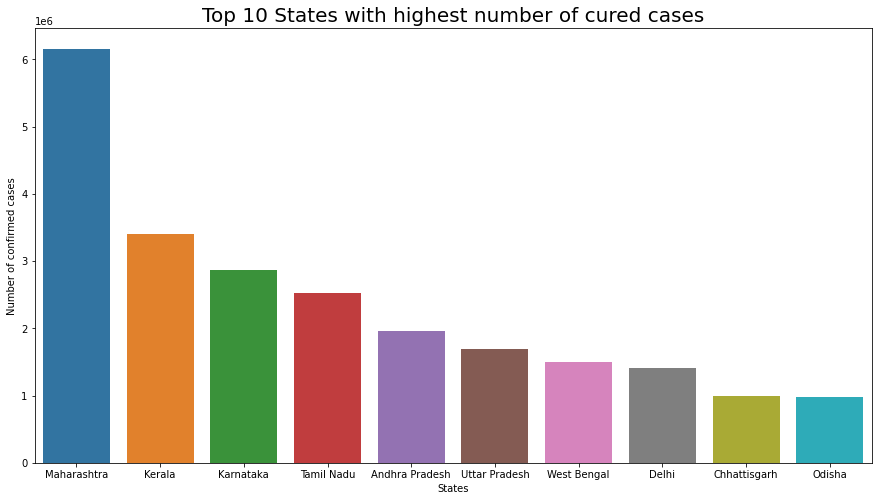

In [13]:
top_10_cured_cases = india_cases.sort_values('Cured',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_cases.iloc[:10],y=top_10_cured_cases.Cured,x=top_10_cured_cases.index).set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

## Analysis of StateWise Testing

In [14]:
state_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [15]:
state_df.shape

(16336, 5)

In [16]:
state_df.isna().sum()

Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64

In [17]:
state_df['Positive'] = state_df['Positive'].fillna(0)

state_df['Negative'] = state_df['Negative'].fillna(0)

In [18]:
state_df.isna().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [19]:
statewise_testing = pd.pivot_table(state_df, values=['TotalSamples','Positive','Negative'], index='State', aggfunc='max')
statewise_testing['Positive_Case_Rate'] = statewise_testing['Positive']*100 / statewise_testing['TotalSamples']
statewise_testing['Positive_Case_Rate']=round(statewise_testing['Positive_Case_Rate'].astype('int'),2)
statewise_testing = statewise_testing.sort_values(by='TotalSamples', ascending= False)
statewise_testing

C:\Users\Tanuja\anaconda3\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  return f(*args, **kwargs)


,Positive,TotalSamples,Positive_Case_Rate
State,,,
Uttar Pradesh,126722.0,67897856.0,0
Maharashtra,1638961.0,49905065.0,3
Karnataka,264546.0,40104915.0,0
Tamil Nadu,367430.0,39002757.0,0
Bihar,90553.0,38820518.0,0
Kerala,932639.0,28745545.0,3
Gujarat,136004.0,26192626.0,0
Andhra Pradesh,235525.0,25311733.0,0
Delhi,151928.0,24333906.0,0


## Analysis of Covid Vaccine State-Wise

In [32]:
vaccination = pd.read_csv("covid_vaccine_statewise.csv")
vaccination.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [33]:
vaccination.shape

(7845, 24)

In [34]:
vaccination.isnull().sum()/100

Updated On                              0.00
State                                   0.00
Total Doses Administered                2.24
Sessions                                2.24
 Sites                                  2.24
First Dose Administered                 2.24
Second Dose Administered                2.24
Male (Doses Administered)               3.84
Female (Doses Administered)             3.84
Transgender (Doses Administered)        3.84
 Covaxin (Doses Administered)           2.24
CoviShield (Doses Administered)         2.24
Sputnik V (Doses Administered)         48.50
AEFI                                   24.07
18-44 Years (Doses Administered)       61.43
45-60 Years (Doses Administered)       61.43
60+ Years (Doses Administered)         61.43
18-44 Years(Individuals Vaccinated)    41.12
45-60 Years(Individuals Vaccinated)    41.11
60+ Years(Individuals Vaccinated)      41.11
Male(Individuals Vaccinated)           76.85
Female(Individuals Vaccinated)         76.85
Transgende

## Male and Female Vaccinated ratio for Covid19

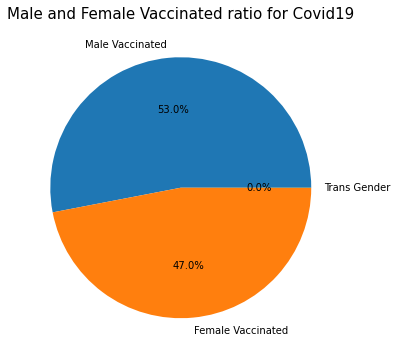

In [35]:
male = vaccination["Male(Individuals Vaccinated)"].sum() 
female = vaccination["Female(Individuals Vaccinated)"].sum()  
trans = vaccination["Transgender(Individuals Vaccinated)"].sum()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(labels=["Male Vaccinated","Female Vaccinated","Trans Gender"],x=[male,female,trans], autopct="%.1f%%")
plt.title("Male and Female Vaccinated ratio for Covid19", size=15)
plt.show()

## Doses administered vs People Vaccinated

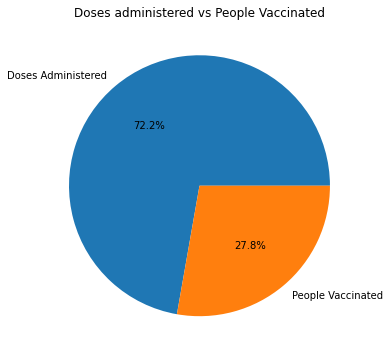

In [37]:
Doses = vaccination["Total Doses Administered"].sum() 
Vaccinated = vaccination["Total Individuals Vaccinated"].sum()  

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(labels=["Doses Administered","People Vaccinated"],x=[Doses,Vaccinated], autopct="%.1f%%")
plt.title("Doses administered vs People Vaccinated")
plt.show()